# Normalizing exponentially distributed data

In [33]:
# Algos
import numpy as np
from scipy import stats

# Plots
import matplotlib.pyplot as plt
import statsmodels.api as sm

First, let's generate a data set.

In [34]:
np.random.seed(42)
data = np.random.exponential(size = 1000)

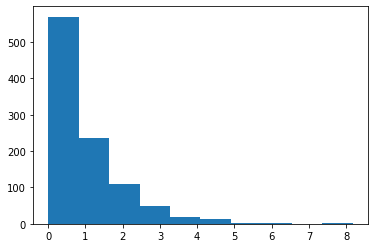

In [35]:
plt.hist(data)
plt.show()

Here's a [Q-Q plot](https://data.library.virginia.edu/understanding-q-q-plots/) to illustrate that this data isn't close to normally distributed. (Normally distributed data would be close to the 45 degree line.)

/Users/willie/.local/share/virtualenvs/stats-demos-b_DKcnN0/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


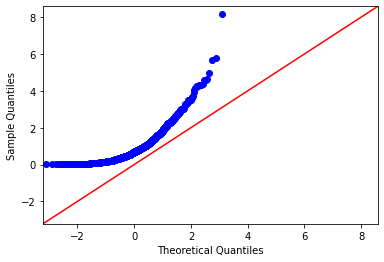

In [66]:
sm.qqplot(data, line='45')
plt.show()

Here's a skewness test (H0: skewness matches normal distribution), which is also a common way to test for normality. (We typically want to see the skewness test statistic between -0.80 and 0.80, with values closer to 0.0 being better.)

In [37]:
stats.skewtest(data)

SkewtestResult(statistic=16.683721393214153, pvalue=1.721524506134487e-62)

We could do other tests too, like checking kurtosis, or running inferential tests like Kolmogorov-Smirnov or Shapiro-Wilk's W test. But a Q-Q plot and skewness test will be good enough for now.

See [this](https://help.gooddata.com/doc/en/reporting-and-dashboards/maql-analytical-query-language/maql-expression-reference/aggregation-functions/statistical-functions/predictive-statistical-use-cases/normality-testing-skewness-and-kurtosis) for more info on skewness and kurtosis testing.

Now we'll try a series of transformations to see how they behave on this data set.

## Log transform

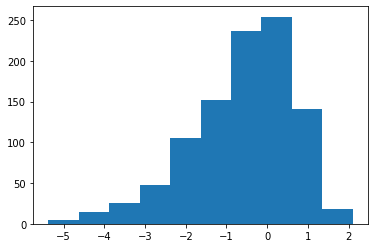

In [48]:
log_data = np.log(data)
plt.hist(log_data)
plt.show()

/Users/willie/.local/share/virtualenvs/stats-demos-b_DKcnN0/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


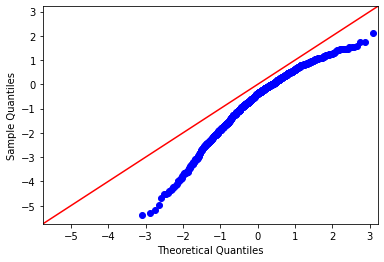

In [49]:
sm.qqplot(log_data, line='45')
plt.show()

In [50]:
stats.skewtest(log_data)

SkewtestResult(statistic=-9.519917686741717, pvalue=1.7331628824628637e-21)

## Square root transform

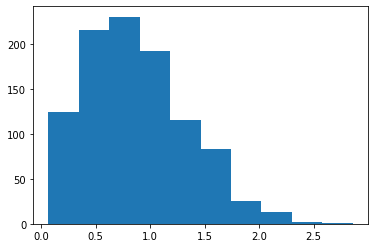

In [52]:
sqrt_data = np.sqrt(data)
plt.hist(sqrt_data)
plt.show()

/Users/willie/.local/share/virtualenvs/stats-demos-b_DKcnN0/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


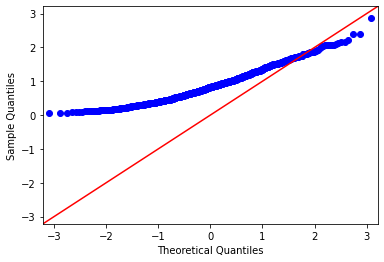

In [55]:
sm.qqplot(sqrt_data, line='45')
plt.show()

In [54]:
stats.skewtest(sqrt_data)

SkewtestResult(statistic=7.217158402298691, pvalue=5.308512981685476e-13)

## Inverse transform (non-zero data only)

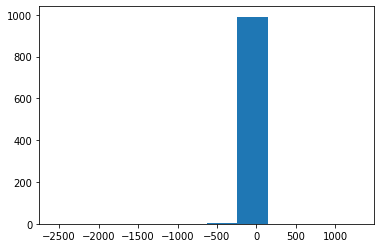

In [56]:
inv_data = np.reciprocal(1 - data)
plt.hist(inv_data)
plt.show()

/Users/willie/.local/share/virtualenvs/stats-demos-b_DKcnN0/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


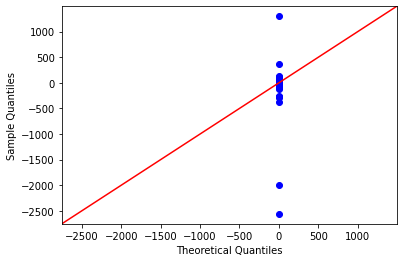

In [57]:
sm.qqplot(inv_data, line='45')
plt.show()

In [58]:
stats.skewtest(inv_data)

SkewtestResult(statistic=-38.78846249364161, pvalue=0.0)

## Box-Cox transform

Helps with

- non-additivity (e.g., helps with STL time series decomposition, which assumes additivity)
- non-normality
- heteroskedaticity

See [The Box-Cox transformation technique: a review](https://www.researchgate.net/publication/268412346_The_Box-Cox_Transformation_Technique_A_Review) for more information.

Box-Cox: lambda=0.24618452757119594


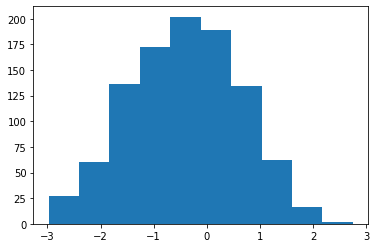

In [61]:
bc_data, bc_lambda = stats.boxcox(data)
print(f"Box-Cox: lambda={bc_lambda}")
plt.hist(bc_data)
plt.show()

(array([ 11.,  25.,  46., 105., 145., 213., 227., 161.,  63.,   4.]),
 array([0.58435646, 0.6492981 , 0.71423973, 0.77918137, 0.84412301,
        0.90906465, 0.97400628, 1.03894792, 1.10388956, 1.1688312 ,
        1.23377284]),
 <BarContainer object of 10 artists>)

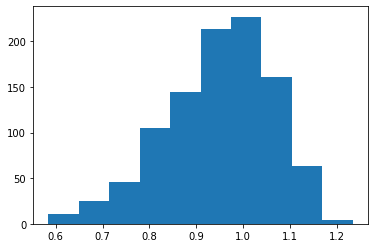

In [75]:
plt.hist(np.power(data, 0.1))

/Users/willie/.local/share/virtualenvs/stats-demos-b_DKcnN0/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


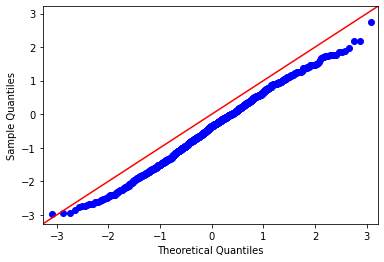

In [62]:
sm.qqplot(bc_data, line='45')
plt.show()

In [ ]:
stats.skewtest(bc_data)